In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import entropy

from utils import *

In [2]:
# Consider the patients for which we have the alphafold proteins (the ones that don't have it will have None/NaN)
df = generate_df(config=None, generate_graph=False)
df.head()

,Protein change allele 1,Protein change allele 2,structure_allele1,structure_allele2,pdb_file_allele1,pdb_file_allele2
0,G161R,His371Profs,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/H371fs_9b3dd/H371fs...
1,G161R,G161R,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...
2,G161R,M368V,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...
3,Y6_G29del ivs1-1G>A,Y6_G29del ivs1-1G>A,None,None,NaN,NaN
4,G161R,G161R,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...


In [3]:
# Retrieve the questionnaires for the patients
df_all = pd.read_excel('../datasets/aku_prin_v2.0.xlsx')
df_all.head()

,patient,sex,birth,creatinine_urines mg/dl,HGA_u mg/dl,HGA_U mg/24h,bqa,urate,uric_acid_urine,tyr_urines,...,creatinine_plasma,hga_plasma,tyr,phe,trp,hypoxanthine,xanthine,uracil,uric_acid,nitisinone
0,101A,F,1963.0,24.88,111.360000,NaN,NaN,NaN,NaN,0.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102A,F,1964.0,26.01,89.220390,NaN,NaN,NaN,NaN,0.652284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,105A,F,1958.0,32.80,156.127275,NaN,NaN,NaN,NaN,1.08714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,106A,F,1954.0,18.09,68.134380,NaN,NaN,NaN,NaN,<0.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,107A,F,1952.0,36.19,165.291450,NaN,NaN,NaN,NaN,<0.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_all.columns

Index(['patient', 'sex', 'birth', 'creatinine_urines mg/dl', 'HGA_u mg/dl',
       'HGA_U mg/24h', 'bqa', 'urate', 'uric_acid_urine', 'tyr_urines',
       'hypoxanthine_urines', 'xanthine_urines', 'Protein change allele 1 ',
       'DNA change allele 1', 'Exon/intron allele 1',
       'Protein change allele 2', 'DNA change allele 2', 'ex/in allele 2',
       'SAA (ug/mL) ', 'chitotriosidase', 'HGA_serum', 'CATD (ng/mL)',
       'IL-6 (pg/mL)', 'IL-1beta (pg/mL)', 'IL-1ra (pg/mL)', 'TNFalfa (pg/mL)',
       'CRP (mg/dL)', 'CRP (æg/mL) ELISA', 'MMP3 (ng/mL)', 'aopp',
       'glucose(mg/dL)', 'creatinine (mg/dL)', 'cholesterol (mg/dL)',
       'triglycerides  (mg/dL)', 'hdl_cholesterol (mg/dL)',
       'ldl_cholesterol (mg/dL)', 'alkaline_phosphatase (UI/L)',
       'cystatin_C (mg/dL)', 'smoker/cigarettes_a_day', 'alcohol_units_weekly',
       'bmi', 'physical_health_score', 'mental_health_score',
       'AKUSSI_jointpain', 'AKUSSI_spinalpain', 'KOOSpain', 'KOOSsymptoms',
       'KOOSdai

In [5]:
columns = [
    'patient',
    'sex', 
    'birth', 
    'bmi',
    'physical_health_score', 
    'mental_health_score',
    'AKUSSI_jointpain', 
    'AKUSSI_spinalpain', 
    'KOOSpain', 
    'KOOSsymptoms',
    'KOOSdaily_living', 
    'KOOSsport', 
    'KOOS_QOL', 
    'HAQ_hapVAS', 
    'HAQ_haqDI',
    ]

df_all = df_all[columns]
df_all.head()

,patient,sex,birth,bmi,physical_health_score,mental_health_score,AKUSSI_jointpain,AKUSSI_spinalpain,KOOSpain,KOOSsymptoms,KOOSdaily_living,KOOSsport,KOOS_QOL,HAQ_hapVAS,HAQ_haqDI
0,101A,F,1963.0,27.34,26.0,43.0,57.0,75.0,67.0,89.0,75.0,70.0,69.0,63.0,1.50
1,102A,F,1964.0,24.47,53.0,51.0,29.0,25.0,92.0,96.0,91.0,85.0,75.0,23.0,0.25
2,105A,F,1958.0,33.98,23.0,40.0,36.0,100.0,47.0,39.0,31.0,0.0,19.0,53.0,1.75
3,106A,F,1954.0,34.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,107A,F,1952.0,26.29,23.0,29.0,50.0,100.0,33.0,29.0,60.0,25.0,13.0,70.0,2.00


In [6]:
len(df_all), len(df)

(219, 219)

In [7]:
# concatenate the dataframes
df = pd.concat([df, df_all], axis=1)

In [8]:
# drop the patients that haven't the alphafold proteins: pdb_file_allele1, pdb_file_allele2
df = df.dropna(subset=['pdb_file_allele1', 'pdb_file_allele2'])
df.isna().sum()

Protein change allele 1      0
Protein change allele 2      0
structure_allele1            0
structure_allele2            0
pdb_file_allele1             0
pdb_file_allele2             0
patient                      0
sex                          0
birth                        3
bmi                         43
physical_health_score       35
mental_health_score         35
AKUSSI_jointpain            46
AKUSSI_spinalpain           46
KOOSpain                    48
KOOSsymptoms                48
KOOSdaily_living            48
KOOSsport                   51
KOOS_QOL                    48
HAQ_hapVAS                  48
HAQ_haqDI                   46
dtype: int64

In [9]:
# drop the patients that haven't the questionnaires data
df = df.dropna(subset=columns)

In [10]:
df.isna().sum()

Protein change allele 1     0
Protein change allele 2     0
structure_allele1           0
structure_allele2           0
pdb_file_allele1            0
pdb_file_allele2            0
patient                     0
sex                         0
birth                       0
bmi                         0
physical_health_score       0
mental_health_score         0
AKUSSI_jointpain            0
AKUSSI_spinalpain           0
KOOSpain                    0
KOOSsymptoms                0
KOOSdaily_living            0
KOOSsport                   0
KOOS_QOL                    0
HAQ_hapVAS                  0
HAQ_haqDI                   0
dtype: int64

In [11]:
df.tail()

,Protein change allele 1,Protein change allele 2,structure_allele1,structure_allele2,pdb_file_allele1,pdb_file_allele2,patient,sex,birth,bmi,...,mental_health_score,AKUSSI_jointpain,AKUSSI_spinalpain,KOOSpain,KOOSsymptoms,KOOSdaily_living,KOOSsport,KOOS_QOL,HAQ_hapVAS,HAQ_haqDI
187,M368V,S59fs,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,../datasets/ALPHAFOLD PDBs/S59fs_cd7b7/S59fs_c...,236B,M,1963.0,25.57,...,54.0,29.0,75.0,92.0,100.0,97.0,83.0,94.0,65.0,0.50
188,E401Q,E401Q,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/E401Q_0f21c/E401Q_0...,../datasets/ALPHAFOLD PDBs/E401Q_0f21c/E401Q_0...,237B,M,1968.0,32.60,...,39.0,29.0,100.0,31.0,36.0,21.0,0.0,0.0,77.0,1.88
189,M368V,M368V,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,238B,M,1963.0,25.14,...,50.0,21.0,25.0,83.0,89.0,99.0,100.0,100.0,20.0,0.25
190,M368V,M368V,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,239B,M,1958.0,23.12,...,31.0,43.0,75.0,72.0,86.0,74.0,40.0,56.0,43.0,0.50
218,E168K,E168K,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/E168K_b43e7/E168K_b...,../datasets/ALPHAFOLD PDBs/E168K_b43e7/E168K_b...,299S,M,1952.0,28.35,...,61.0,29.0,50.0,64.0,86.0,66.0,30.0,44.0,40.0,1.50


In [12]:
# see how many different values has `parients`
df['patient'].nunique()

103

In [13]:
# read excel file
df_metrics = pd.read_excel('../datasets/mutation_metrics.xlsx')
df_metrics.head()

,mutation,pdb_file,RMSD,RMSD all,Sequence alignment score
0,G309V,/Users/lavo/Desktop/Projects/CHL-Project/datas...,0.541,0.936,2320.7
1,G185R,/Users/lavo/Desktop/Projects/CHL-Project/datas...,0.532,0.970,2321.4
2,E168L,/Users/lavo/Desktop/Projects/CHL-Project/datas...,0.544,0.795,2321.4
3,R225H,/Users/lavo/Desktop/Projects/CHL-Project/datas...,0.508,0.646,2323.5
4,R53Q,/Users/lavo/Desktop/Projects/CHL-Project/datas...,0.530,0.962,2315.2


In [14]:
# drop column pdb_file
df_metrics = df_metrics.drop(columns=['pdb_file'])
df_metrics.head()

,mutation,RMSD,RMSD all,Sequence alignment score
0,G309V,0.541,0.936,2320.7
1,G185R,0.532,0.970,2321.4
2,E168L,0.544,0.795,2321.4
3,R225H,0.508,0.646,2323.5
4,R53Q,0.530,0.962,2315.2


In [15]:
df_metrics.tail()

,mutation,RMSD,RMSD all,Sequence alignment score
59,G270R,0.559,1.004,2321.4
60,G123A,0.523,0.878,2322.8
61,G115Mfs*,1.384,22.375,647.8
62,His371Profs,0.648,0.853,1890.4
63,L353Q,0.571,0.892,2324.2


In [16]:
mut = {}
for i in range(len(df_metrics)):
    mut[df_metrics['mutation'][i]] = [float(df_metrics['RMSD'][i]), float(df_metrics['RMSD all'][i]), float(df_metrics['Sequence alignment score'][i])]
    

In [17]:
mut

{'G309V': [0.541, 0.936, 2320.7],
 'G185R': [0.532, 0.97, 2321.4],
 'E168L': [0.544, 0.795, 2321.4],
 'R225H': [0.508, 0.646, 2323.5],
 'R53Q': [0.53, 0.962, 2315.2],
 'W97C': [0.521, 0.897, 2317.9],
 'K353Q': [0.571, 0.892, 2324.2],
 'G360A': [0.532, 0.9, 2322.8],
 'G360R': [0.522, 1.043, 2321.4],
 'S59fs': [0.794, 24.713, 303.2],
 'G372_P373delinsA': [0.554, 1.019, 2298.9],
 'A267V': [0.489, 0.911, 2324.2],
 'D153G': [0.52, 0.663, 2319.1],
 'G251D': [0.509, 0.919, 2322.1],
 'L116P': [0.493, 0.866, 2313.1],
 'T167I': [0.52, 0.975, 2319.2],
 'A218fs': [0.887, 7.14, 1041.5],
 'R321*': [0.607, 0.664, 1626.5],
 'F227S': [0.492, 0.849, 2321.4],
 'A122V': [0.532, 0.676, 2324.2],
 'Y40S': [0.525, 0.942, 2320.7],
 'G362E': [0.584, 0.754, 2321.4],
 'E168K': [0.514, 0.715, 2324.2],
 'S150L': [0.521, 0.983, 2322.8],
 'G361R': [0.534, 0.944, 2321.4],
 'E168*': [1.19, 22.774, 735.3],
 'G152R': [0.547, 0.753, 2321.4],
 'S47L': [0.542, 1.342, 2322.8],
 'L44F': [0.516, 0.633, 2324.2],
 'I216T': [0.48

In [18]:
# initialize to none the columns
df['RMSD_A1'] = None
df['RMSD_all_A1'] = None
df['Alignment_A1'] = None
df['RMSD_A2'] = None
df['RMSD_all_A2'] = None
df['Alignment_A2'] = None

In [19]:
for i in df.index:
    if df['Protein change allele 1 '][i] in mut:
        df['RMSD_A1'][i] = mut[df['Protein change allele 1 '][i]][0]
        df['RMSD_all_A1'][i] = mut[df['Protein change allele 1 '][i]][1]
        df['Alignment_A1'][i] = mut[df['Protein change allele 1 '][i]][2]
    if df['Protein change allele 2'][i] in mut:
        df['RMSD_A2'][i] = mut[df['Protein change allele 2'][i]][0]
        df['RMSD_all_A2'][i] = mut[df['Protein change allele 2'][i]][1]
        df['Alignment_A2'][i] = mut[df['Protein change allele 2'][i]][2]


/var/folders/r7/204yvtz15gq3t73qg5kdwc_00000gn/T/ipykernel_57278/1122565605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RMSD_A1'][i] = mut[df['Protein change allele 1 '][i]][0]
/var/folders/r7/204yvtz15gq3t73qg5kdwc_00000gn/T/ipykernel_57278/1122565605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RMSD_all_A1'][i] = mut[df['Protein change allele 1 '][i]][1]
/var/folders/r7/204yvtz15gq3t73qg5kdwc_00000gn/T/ipykernel_57278/1122565605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [20]:
df.head()

,Protein change allele 1,Protein change allele 2,structure_allele1,structure_allele2,pdb_file_allele1,pdb_file_allele2,patient,sex,birth,bmi,...,KOOSsport,KOOS_QOL,HAQ_hapVAS,HAQ_haqDI,RMSD_A1,RMSD_all_A1,Alignment_A1,RMSD_A2,RMSD_all_A2,Alignment_A2
0,G161R,His371Profs,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/H371fs_9b3dd/H371fs...,101A,F,1963.0,27.34,...,70.0,69.0,63.0,1.50,0.521,0.888,2314.8,0.648,0.853,1890.4
1,G161R,G161R,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,102A,F,1964.0,24.47,...,85.0,75.0,23.0,0.25,0.521,0.888,2314.8,0.521,0.888,2314.8
2,G161R,M368V,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,105A,F,1958.0,33.98,...,0.0,19.0,53.0,1.75,0.521,0.888,2314.8,0.55,0.712,2315.2
4,G161R,G161R,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,107A,F,1952.0,26.29,...,25.0,13.0,70.0,2.00,0.521,0.888,2314.8,0.521,0.888,2314.8
5,G161R,G161R,"(((<Residue MET het= resseq=1 icode= >, <Resi...","(((<Residue MET het= resseq=1 icode= >, <Resi...",../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,108A,F,1956.0,27.18,...,35.0,13.0,71.0,1.88,0.521,0.888,2314.8,0.521,0.888,2314.8


In [21]:
# save to csv

df.to_csv('../datasets/df_with_scores.csv', index=False)


# if you have the dataset run from here

In [22]:
# load the data
df = pd.read_csv('../datasets/df_with_scores.csv')

In [23]:
df.tail()

,Protein change allele 1,Protein change allele 2,structure_allele1,structure_allele2,pdb_file_allele1,pdb_file_allele2,patient,sex,birth,bmi,...,KOOSsport,KOOS_QOL,HAQ_hapVAS,HAQ_haqDI,RMSD_A1,RMSD_all_A1,Alignment_A1,RMSD_A2,RMSD_all_A2,Alignment_A2
98,M368V,S59fs,<Structure id=M368V>,<Structure id=S59fs>,../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,../datasets/ALPHAFOLD PDBs/S59fs_cd7b7/S59fs_c...,236B,M,1963.0,25.57,...,83.0,94.0,65.0,0.50,0.550,0.712,2315.2,0.794,24.713,303.2
99,E401Q,E401Q,<Structure id=E401Q>,<Structure id=E401Q>,../datasets/ALPHAFOLD PDBs/E401Q_0f21c/E401Q_0...,../datasets/ALPHAFOLD PDBs/E401Q_0f21c/E401Q_0...,237B,M,1968.0,32.60,...,0.0,0.0,77.0,1.88,0.516,0.958,2328.5,0.516,0.958,2328.5
100,M368V,M368V,<Structure id=M368V>,<Structure id=M368V>,../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,238B,M,1963.0,25.14,...,100.0,100.0,20.0,0.25,0.550,0.712,2315.2,0.550,0.712,2315.2
101,M368V,M368V,<Structure id=M368V>,<Structure id=M368V>,../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,239B,M,1958.0,23.12,...,40.0,56.0,43.0,0.50,0.550,0.712,2315.2,0.550,0.712,2315.2
102,E168K,E168K,<Structure id=E168K>,<Structure id=E168K>,../datasets/ALPHAFOLD PDBs/E168K_b43e7/E168K_b...,../datasets/ALPHAFOLD PDBs/E168K_b43e7/E168K_b...,299S,M,1952.0,28.35,...,30.0,44.0,40.0,1.50,0.514,0.715,2324.2,0.514,0.715,2324.2


In [24]:
# group by the columns 'Protein change allele 1 ' and 'Protein change allele 2' to see how many patients have the same mutations
df_set = df.groupby(['Protein change allele 1 ', 'Protein change allele 2']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
df_set.head()

,Protein change allele 1,Protein change allele 2,counts
15,G161R,G161R,13
0,A122V,A122V,10
38,M368V,M368V,5
43,Q29fs,Q29fs,4
46,R53Q,R53Q,4


In [25]:
# get the indexes of the patients that have the same mutations
indexes = []
for i in range(len(df_set)):
    indexes.append(df[(df['Protein change allele 1 '] == df_set['Protein change allele 1 '][i]) & (df['Protein change allele 2'] == df_set['Protein change allele 2'][i])].index)

df_single = df.iloc[indexes[15]]
df_single.head(14)


,Protein change allele 1,Protein change allele 2,structure_allele1,structure_allele2,pdb_file_allele1,pdb_file_allele2,patient,sex,birth,bmi,...,KOOSsport,KOOS_QOL,HAQ_hapVAS,HAQ_haqDI,RMSD_A1,RMSD_all_A1,Alignment_A1,RMSD_A2,RMSD_all_A2,Alignment_A2
1,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,102A,F,1964.0,24.47,...,85.0,75.0,23.0,0.25,0.521,0.888,2314.8,0.521,0.888,2314.8
3,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,107A,F,1952.0,26.29,...,25.0,13.0,70.0,2.00,0.521,0.888,2314.8,0.521,0.888,2314.8
4,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,108A,F,1956.0,27.18,...,35.0,13.0,71.0,1.88,0.521,0.888,2314.8,0.521,0.888,2314.8
6,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,1102S,F,1962.0,27.06,...,60.0,56.0,2.0,0.63,0.521,0.888,2314.8,0.521,0.888,2314.8
13,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,112A,F,1957.0,26.14,...,0.0,0.0,48.0,2.50,0.521,0.888,2314.8,0.521,0.888,2314.8
23,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,1146S,F,1974.0,33.90,...,75.0,69.0,30.0,0.88,0.521,0.888,2314.8,0.521,0.888,2314.8
28,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,1174S,F,1976.0,28.20,...,100.0,88.0,3.0,0.00,0.521,0.888,2314.8,0.521,0.888,2314.8
43,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,124A,F,1957.0,21.99,...,90.0,69.0,37.0,0.13,0.521,0.888,2314.8,0.521,0.888,2314.8
48,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,209A,M,1959.0,27.78,...,0.0,25.0,81.0,1.88,0.521,0.888,2314.8,0.521,0.888,2314.8
72,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,215A,M,1959.0,26.09,...,20.0,31.0,62.0,0.75,0.521,0.888,2314.8,0.521,0.888,2314.8


In [26]:
df_single = df_single.drop(columns=['pdb_file_allele1', 'pdb_file_allele2'])

In [27]:
df_single = df_single.drop(columns=['patient', 'structure_allele1', 'structure_allele2'])

In [28]:
df_single = df_single.drop(columns=['Protein change allele 1 '])

In [29]:
df_single = df_single.drop(columns=['RMSD_A2',	'RMSD_all_A2',	'Alignment_A2'])

In [30]:
# change the column birth with 2024 - birth
df_single['birth'] = 2024 - df_single['birth']

In [31]:
# reanem column birth with age
df_single = df_single.rename(columns={'birth': 'age'})

In [32]:
df_single.head(14)

,Protein change allele 2,sex,age,bmi,physical_health_score,mental_health_score,AKUSSI_jointpain,AKUSSI_spinalpain,KOOSpain,KOOSsymptoms,KOOSdaily_living,KOOSsport,KOOS_QOL,HAQ_hapVAS,HAQ_haqDI,RMSD_A1,RMSD_all_A1,Alignment_A1
1,G161R,F,60.0,24.47,53.0,51.0,29.0,25.0,92.0,96.0,91.0,85.0,75.0,23.0,0.25,0.521,0.888,2314.8
3,G161R,F,72.0,26.29,23.0,29.0,50.0,100.0,33.0,29.0,60.0,25.0,13.0,70.0,2.00,0.521,0.888,2314.8
4,G161R,F,68.0,27.18,26.0,31.0,50.0,100.0,44.0,29.0,32.0,35.0,13.0,71.0,1.88,0.521,0.888,2314.8
6,G161R,F,62.0,27.06,41.0,64.0,21.0,0.0,78.0,39.0,76.0,60.0,56.0,2.0,0.63,0.521,0.888,2314.8
13,G161R,F,67.0,26.14,16.0,30.0,43.0,100.0,36.0,21.0,3.0,0.0,0.0,48.0,2.50,0.521,0.888,2314.8
23,G161R,F,50.0,33.90,38.0,36.0,29.0,75.0,56.0,57.0,68.0,75.0,69.0,30.0,0.88,0.521,0.888,2314.8
28,G161R,F,48.0,28.20,54.0,56.0,0.0,25.0,97.0,93.0,100.0,100.0,88.0,3.0,0.00,0.521,0.888,2314.8
43,G161R,F,67.0,21.99,31.0,51.0,43.0,100.0,81.0,89.0,90.0,90.0,69.0,37.0,0.13,0.521,0.888,2314.8
48,G161R,M,65.0,27.78,21.0,36.0,50.0,100.0,50.0,36.0,41.0,0.0,25.0,81.0,1.88,0.521,0.888,2314.8
72,G161R,M,65.0,26.09,32.0,40.0,43.0,50.0,50.0,57.0,62.0,20.0,31.0,62.0,0.75,0.521,0.888,2314.8


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Protein change allele 1   103 non-null    object 
 1   Protein change allele 2   103 non-null    object 
 2   structure_allele1         103 non-null    object 
 3   structure_allele2         103 non-null    object 
 4   pdb_file_allele1          103 non-null    object 
 5   pdb_file_allele2          103 non-null    object 
 6   patient                   103 non-null    object 
 7   sex                       103 non-null    object 
 8   birth                     103 non-null    float64
 9   bmi                       103 non-null    float64
 10  physical_health_score     103 non-null    float64
 11  mental_health_score       103 non-null    float64
 12  AKUSSI_jointpain          103 non-null    float64
 13  AKUSSI_spinalpain         103 non-null    float64
 14  KOOSpain  

---

# From birth to age



In [41]:
df['age'] = 2024 - df['birth']
df = df.drop(columns=['birth'])


In [43]:
# print min and max age
print('min age:', df['age'].min())
print('max age:', df['age'].max())


min age: 37.0
max age: 81.0


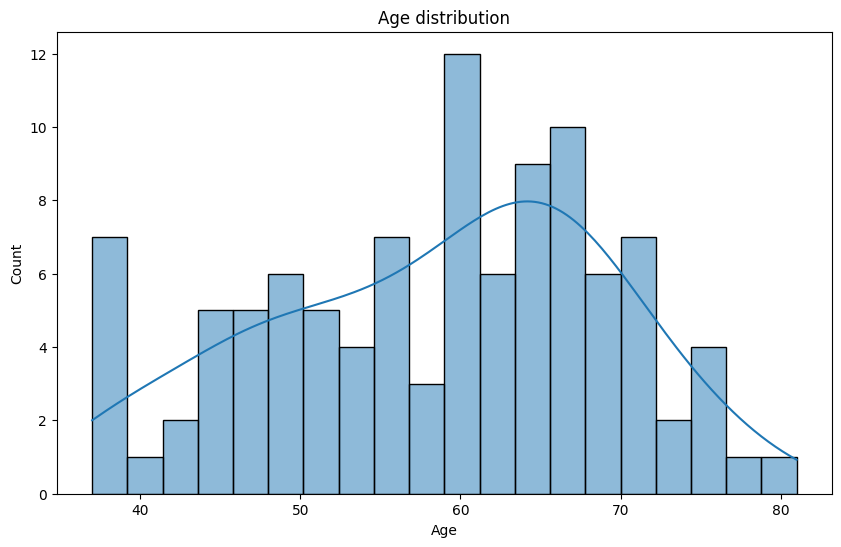

In [44]:
# plot the age distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [45]:
df_sub = df[(df['age'] <= 45)]
len(df_sub)

15

In [46]:
col = [
 'bmi',
 'physical_health_score',
 'mental_health_score',
 'AKUSSI_jointpain',
 'AKUSSI_spinalpain',
 'KOOSpain',
 'KOOSsymptoms',
 'KOOSdaily_living',
 'KOOSsport',
 'KOOS_QOL',
 'HAQ_hapVAS',
 'HAQ_haqDI']

In [47]:
# peint the range of the scores from column 'physical_health_score' to 'HAQ_haqDI'
for i in range(1, len(col)):
    print(col[i])
    print('min:', df_sub[col[i]].min())
    print('max:', df_sub[col[i]].max())
    print('mean:', df_sub[col[i]].mean())
    print('std:', df_sub[col[i]].std())
    print('')

physical_health_score
min: 35.0
max: 61.0
mean: 48.6
std: 7.881261682896065

mental_health_score
min: 24.0
max: 62.0
mean: 48.93333333333333
std: 10.686885599159552

AKUSSI_jointpain
min: 0.0
max: 43.0
mean: 13.733333333333333
std: 13.698105534638549

AKUSSI_spinalpain
min: 0.0
max: 75.0
mean: 31.666666666666668
std: 24.02875261808137

KOOSpain
min: 64.0
max: 100.0
mean: 91.33333333333333
std: 11.152620874976087

KOOSsymptoms
min: 64.0
max: 100.0
mean: 87.93333333333334
std: 9.246363506548837

KOOSdaily_living
min: 62.0
max: 100.0
mean: 90.86666666666666
std: 13.93283207118386

KOOSsport
min: 60.0
max: 100.0
mean: 85.0
std: 14.267845968170128

KOOS_QOL
min: 44.0
max: 100.0
mean: 86.0
std: 18.53182590649317

HAQ_hapVAS
min: 0.0
max: 60.0
mean: 18.533333333333335
std: 20.64622645101682

HAQ_haqDI
min: 0.0
max: 0.63
mean: 0.11733333333333332
std: 0.22556173265448917



In [48]:
df_sub.columns

Index(['Protein change allele 1 ', 'Protein change allele 2',
       'structure_allele1', 'structure_allele2', 'pdb_file_allele1',
       'pdb_file_allele2', 'patient', 'sex', 'bmi', 'physical_health_score',
       'mental_health_score', 'AKUSSI_jointpain', 'AKUSSI_spinalpain',
       'KOOSpain', 'KOOSsymptoms', 'KOOSdaily_living', 'KOOSsport', 'KOOS_QOL',
       'HAQ_hapVAS', 'HAQ_haqDI', 'RMSD_A1', 'RMSD_all_A1', 'Alignment_A1',
       'RMSD_A2', 'RMSD_all_A2', 'Alignment_A2', 'age'],
      dtype='object')

---

# Clustering


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Protein change allele 1   103 non-null    object 
 1   Protein change allele 2   103 non-null    object 
 2   structure_allele1         103 non-null    object 
 3   structure_allele2         103 non-null    object 
 4   pdb_file_allele1          103 non-null    object 
 5   pdb_file_allele2          103 non-null    object 
 6   patient                   103 non-null    object 
 7   sex                       103 non-null    object 
 8   bmi                       103 non-null    float64
 9   physical_health_score     103 non-null    float64
 10  mental_health_score       103 non-null    float64
 11  AKUSSI_jointpain          103 non-null    float64
 12  AKUSSI_spinalpain         103 non-null    float64
 13  KOOSpain                  103 non-null    float64
 14  KOOSsympto

In [51]:
# encode sex columns

df = pd.get_dummies(df, columns=['sex'])

In [57]:
# print sex columns
df.columns

Index(['Protein change allele 1 ', 'Protein change allele 2',
       'structure_allele1', 'structure_allele2', 'pdb_file_allele1',
       'pdb_file_allele2', 'patient', 'bmi', 'physical_health_score',
       'mental_health_score', 'AKUSSI_jointpain', 'AKUSSI_spinalpain',
       'KOOSpain', 'KOOSsymptoms', 'KOOSdaily_living', 'KOOSsport', 'KOOS_QOL',
       'HAQ_hapVAS', 'HAQ_haqDI', 'RMSD_A1', 'RMSD_all_A1', 'Alignment_A1',
       'RMSD_A2', 'RMSD_all_A2', 'Alignment_A2', 'age', 'sex_F', 'sex_M'],
      dtype='object')

NOTE: potremmo anche selezionare sex

In [123]:
cols_for_clustering = ['bmi', 'RMSD_A1', 'RMSD_all_A1', 'Alignment_A1', 'RMSD_A2', 'RMSD_all_A2', 'Alignment_A2', 'age']

In [124]:
df_clustering = df[cols_for_clustering]
df_clustering.head()

,bmi,RMSD_A1,RMSD_all_A1,Alignment_A1,RMSD_A2,RMSD_all_A2,Alignment_A2,age
0,27.34,0.521,0.888,2314.8,0.648,0.853,1890.4,61.0
1,24.47,0.521,0.888,2314.8,0.521,0.888,2314.8,60.0
2,33.98,0.521,0.888,2314.8,0.550,0.712,2315.2,66.0
3,26.29,0.521,0.888,2314.8,0.521,0.888,2314.8,72.0
4,27.18,0.521,0.888,2314.8,0.521,0.888,2314.8,68.0


In [125]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bmi           103 non-null    float64
 1   RMSD_A1       103 non-null    float64
 2   RMSD_all_A1   103 non-null    float64
 3   Alignment_A1  103 non-null    float64
 4   RMSD_A2       103 non-null    float64
 5   RMSD_all_A2   103 non-null    float64
 6   Alignment_A2  103 non-null    float64
 7   age           103 non-null    float64
dtypes: float64(8)
memory usage: 6.6 KB


In [126]:
# count how many nan values are in the columns
df_clustering.isna().sum()

bmi             0
RMSD_A1         0
RMSD_all_A1     0
Alignment_A1    0
RMSD_A2         0
RMSD_all_A2     0
Alignment_A2    0
age             0
dtype: int64

# Standard scaler and pca

In [127]:
# scaling and pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

df_clustering_ss = scaler.fit_transform(df_clustering)
df_clustering_ss = pd.DataFrame(df_clustering_ss, columns=cols_for_clustering)


In [128]:
df_clustering_ss.head()

,bmi,RMSD_A1,RMSD_all_A1,Alignment_A1,RMSD_A2,RMSD_all_A2,Alignment_A2,age
0,0.087303,-0.469329,-0.380573,0.413092,1.007124,-0.376063,-0.195906,0.223349
1,-0.602370,-0.469329,-0.380573,0.413092,-0.497294,-0.371909,0.440944,0.129451
2,1.682921,-0.469329,-0.380573,0.413092,-0.153765,-0.392794,0.441545,0.692839
3,-0.165016,-0.469329,-0.380573,0.413092,-0.497294,-0.371909,0.440944,1.256226
4,0.048854,-0.469329,-0.380573,0.413092,-0.497294,-0.371909,0.440944,0.880634


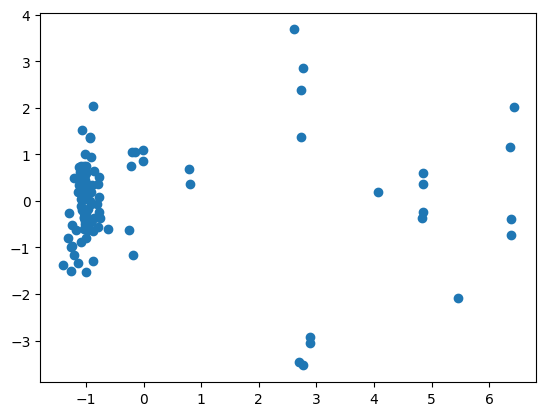

In [129]:
pca = PCA(n_components=2)
df_clustering_pca = pca.fit_transform(df_clustering_ss)

plt.scatter(df_clustering_pca[:, 0], df_clustering_pca[:, 1])

## Clustering

In [130]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = []

SSE = []

silhouette = []

for k in range(1, 10):
    kmeans.append(KMeans(n_clusters=k, random_state=6).fit(df_clustering_ss))
    SSE.append(kmeans[k-1].inertia_)

    if k > 1:
        silhouette.append(silhouette_score(df_clustering_ss, kmeans[k-1].labels_, metric='euclidean'))


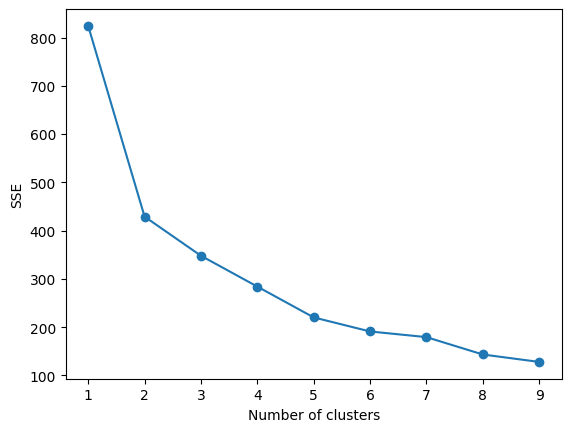

In [131]:
import numpy as np

plt.plot(range(1, 10), SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(np.arange(1, 10, 1))
plt.show()

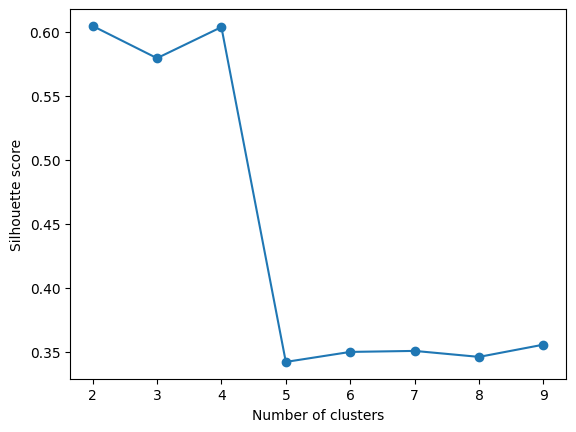

In [132]:
# plot silhouette score
plt.plot(range(2, 10), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(np.arange(2, 10, 1))

plt.show()

we choose 4 clusters !!!

In [133]:
kmeans = KMeans(n_clusters=4, random_state=6).fit(df_clustering_ss)
df['cluster_ss'] = kmeans.labels_
df['cluster_ss'].value_counts()

0    85
1     9
3     5
2     4
Name: cluster_ss, dtype: int64

In [134]:
df_clustering['cluster_ss'] = kmeans.labels_

/var/folders/r7/204yvtz15gq3t73qg5kdwc_00000gn/T/ipykernel_57278/3007971142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['cluster_ss'] = kmeans.labels_


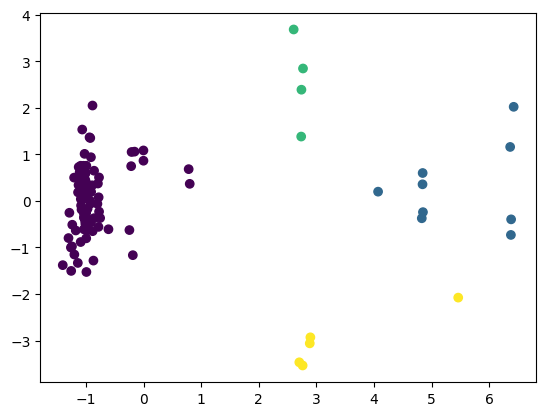

In [135]:
plt.scatter(df_clustering_pca[:, 0], df_clustering_pca[:, 1], c=df_clustering['cluster_ss'], cmap='viridis')

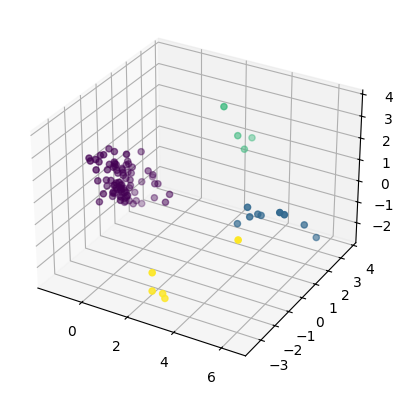

In [136]:
#%matplotlib widget
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pca = PCA(n_components=3)
df_clustering_pca = pca.fit_transform(df_clustering_ss)
ax.scatter(df_clustering_pca[:, 0], df_clustering_pca[:, 1], df_clustering_pca[:, 2], c=df_clustering['cluster_ss'], cmap='viridis')

let's see the properties of each class

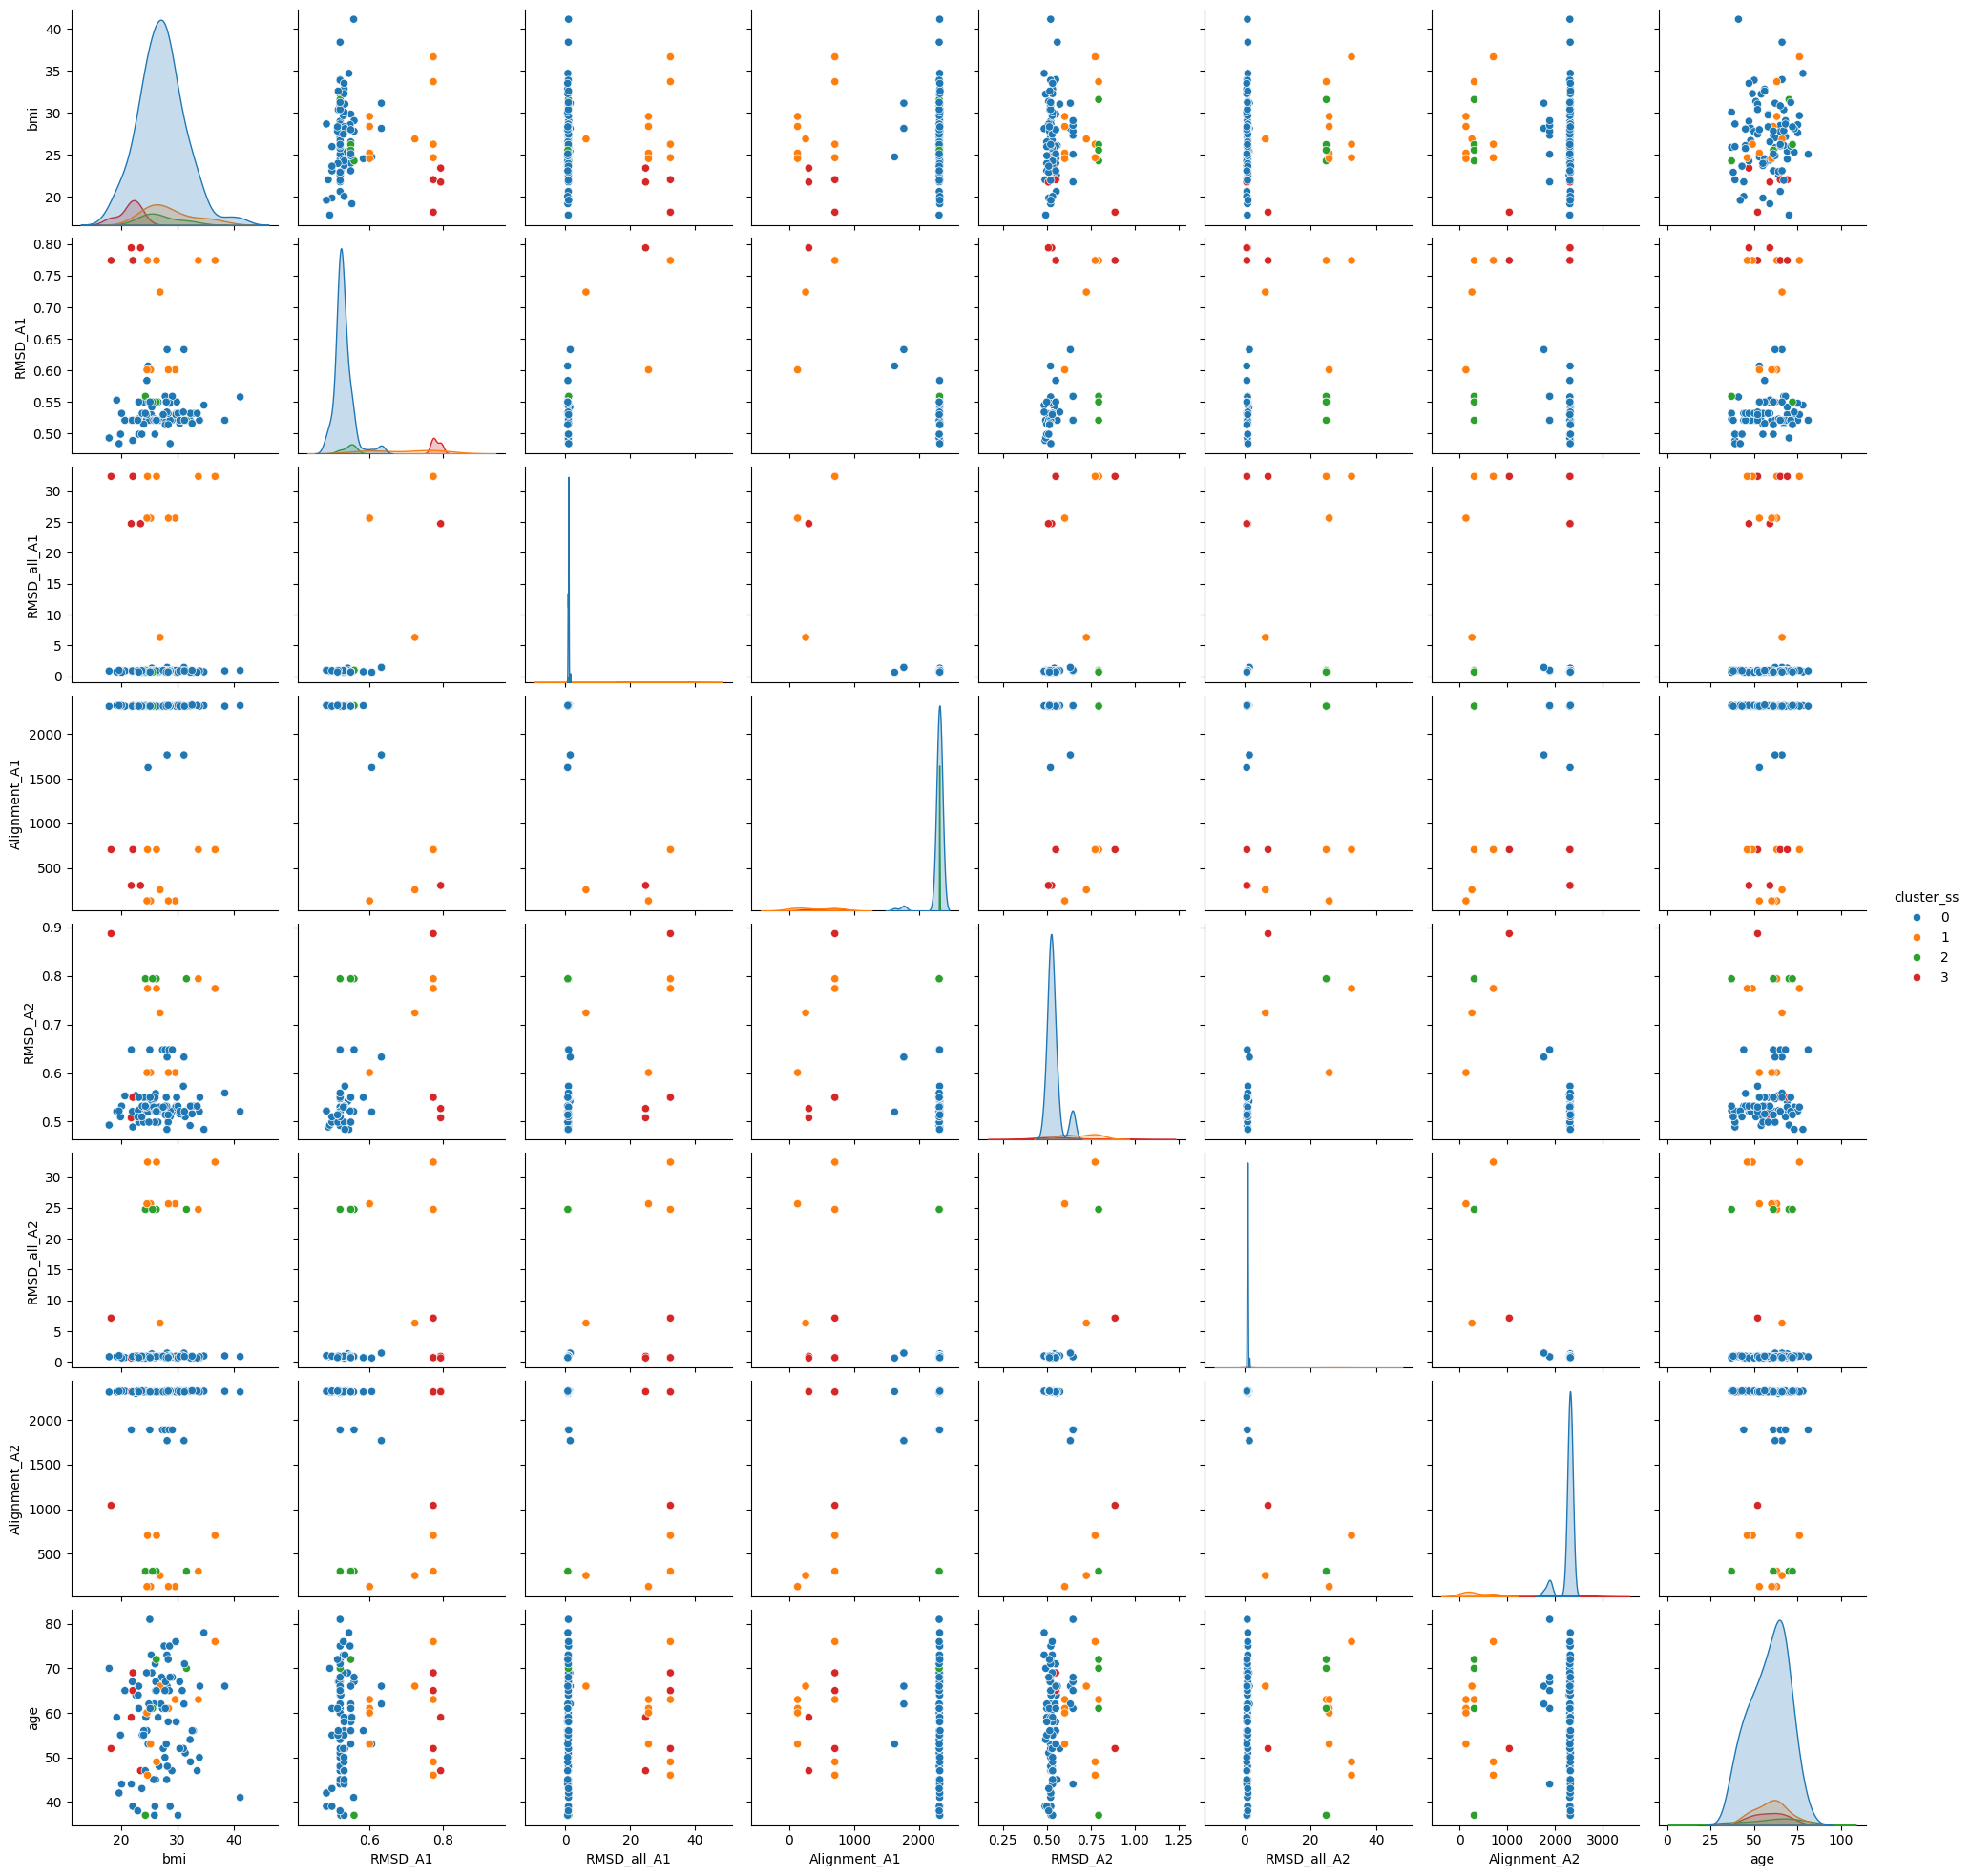

In [137]:
sns.pairplot(df_clustering, hue='cluster_ss',  palette=sns.color_palette(n_colors=4))
plt.show()

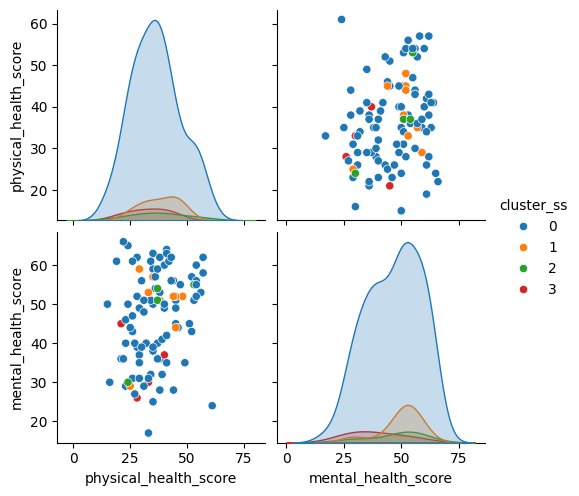

In [138]:
feature_scatter = ['physical_health_score', 'mental_health_score', ]
sns.pairplot(df, hue='cluster_ss', vars=feature_scatter, palette=sns.color_palette(n_colors=4))

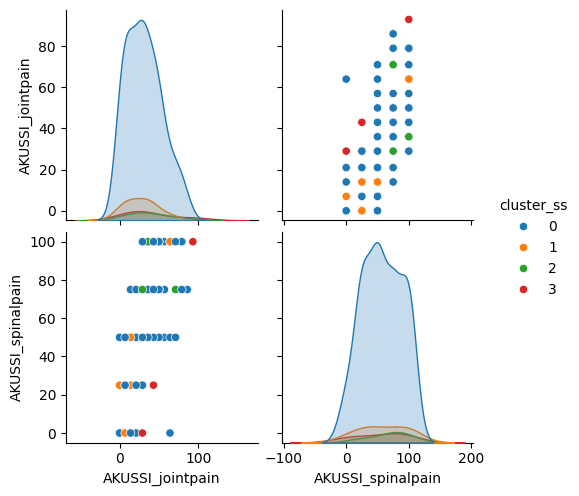

In [139]:
feature_scatter = ['AKUSSI_jointpain', 'AKUSSI_spinalpain']
sns.pairplot(df, hue='cluster_ss', vars=feature_scatter, palette=sns.color_palette(n_colors=4))

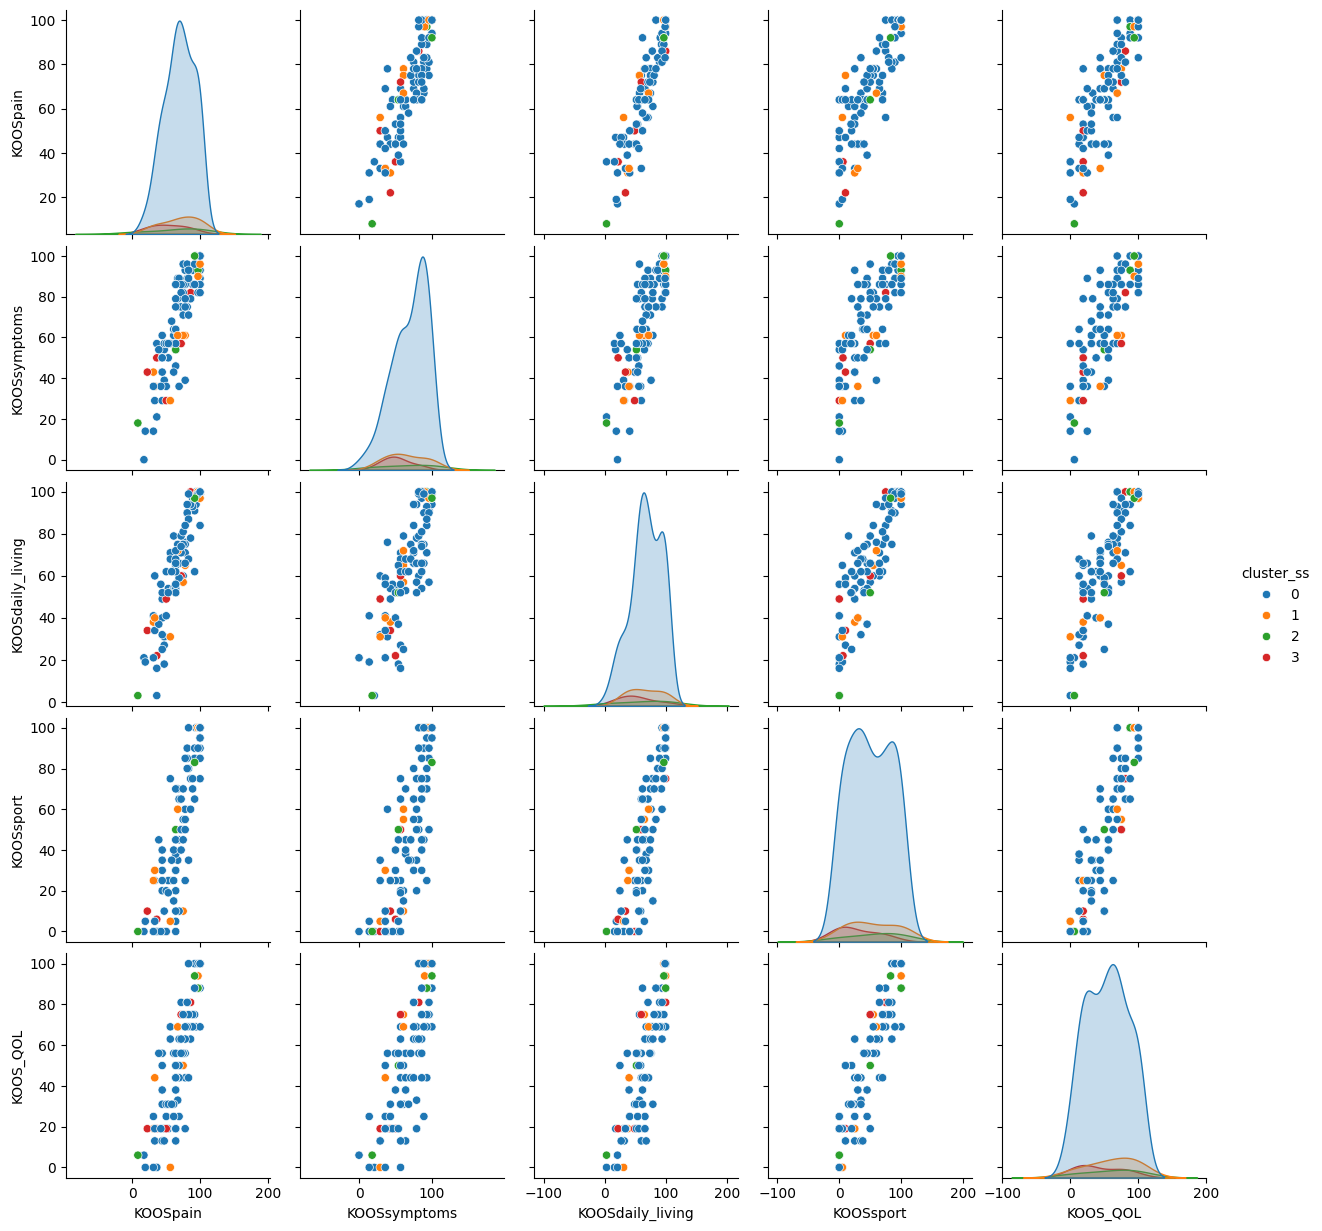

In [140]:
feature_scatter = ['KOOSpain', 'KOOSsymptoms', 'KOOSdaily_living', 'KOOSsport', 'KOOS_QOL']
sns.pairplot(df, hue='cluster_ss', vars=feature_scatter, palette=sns.color_palette(n_colors=4))

In [155]:
# print columns 'Protein cganhe allele 1 ' and 'Protein change allele 2' for istances in cluster 0 without repetitions
df[df['cluster_ss'] == 0][['Protein change allele 1 ', 'Protein change allele 2']]

,physical_health_score,mental_health_score
8,43.0,56.0
33,28.0,26.0
37,40.0,37.0
38,33.0,30.0
39,21.0,45.0


<Axes: xlabel='cluster_ss', ylabel='count'>

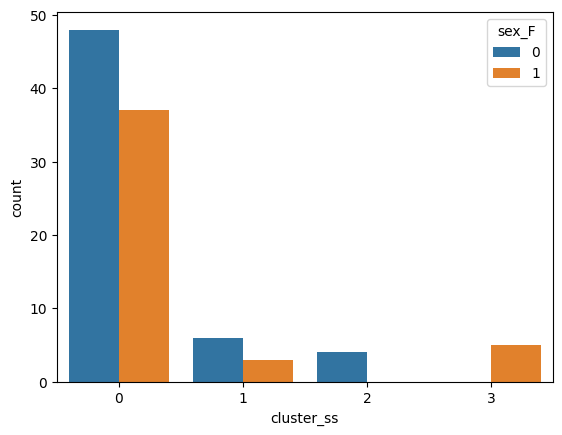

In [156]:
sns.countplot(data=df, x='cluster_ss', hue='sex_F')

In [ ]:
#TODO: change scores(physical healt score ......) to categorical values and do countplot
